Importing dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

data preprocessing


training image preprocessing


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/identifikasi sayur dan buah/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3546 files belonging to 36 classes.


validasi img prepocesing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/identifikasi sayur dan buah/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 368 files belonging to 36 classes.


model

In [5]:
cnn = tf.keras.models.Sequential()

convulution layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [14]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
111/111 [==============================] - 155s 1s/step - loss: 2.4814 - accuracy: 0.3164 - val_loss: 2.5452 - val_accuracy: 0.5462
Epoch 2/32
111/111 [==============================] - 149s 1s/step - loss: 2.1735 - accuracy: 0.3903 - val_loss: 2.3296 - val_accuracy: 0.6522
Epoch 3/32
111/111 [==============================] - 145s 1s/step - loss: 1.8720 - accuracy: 0.4780 - val_loss: 2.1574 - val_accuracy: 0.7772
Epoch 4/32
111/111 [==============================] - 157s 1s/step - loss: 1.5857 - accuracy: 0.5623 - val_loss: 2.1022 - val_accuracy: 0.8342
Epoch 5/32
111/111 [==============================] - 158s 1s/step - loss: 1.2911 - accuracy: 0.6314 - val_loss: 2.1699 - val_accuracy: 0.7228
Epoch 6/32
111/111 [==============================] - 145s 1s/step - loss: 1.1022 - accuracy: 0.6895 - val_loss: 2.6389 - val_accuracy: 0.6413
Epoch 7/32
111/111 [==============================] - 147s 1s/step - loss: 0.9475 - accuracy: 0.7335 - val_loss: 2.4571 - val_accuracy: 0.8859

save model

In [18]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
cnn.save('trained_model.keras')

In [20]:
training_history.history #Return Dictionary of history

{'loss': [2.481398582458496,
  2.17352557182312,
  1.8719990253448486,
  1.5857422351837158,
  1.291072130203247,
  1.102226734161377,
  0.9474810361862183,
  0.7749057412147522,
  0.696287989616394,
  0.6093740463256836,
  0.5604699850082397,
  0.5159621238708496,
  0.424493670463562,
  0.4457848072052002,
  0.3735080361366272,
  0.3806416988372803,
  0.36526939272880554,
  0.3023754358291626,
  0.3677962124347687,
  0.3194238841533661,
  0.324413001537323,
  0.269633412361145,
  0.2728431224822998,
  0.2997460961341858,
  0.29212987422943115,
  0.2828364670276642,
  0.3005545139312744,
  0.32520613074302673,
  0.25115054845809937,
  0.29000046849250793,
  0.27170267701148987,
  0.25813642144203186],
 'accuracy': [0.31641286611557007,
  0.3902989327907562,
  0.4780033826828003,
  0.5623237490653992,
  0.6314156651496887,
  0.6895093321800232,
  0.7335025668144226,
  0.7820078730583191,
  0.807106614112854,
  0.8260011076927185,
  0.8530738949775696,
  0.8646361827850342,
  0.879582643

In [21]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


akurasi model

In [23]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 91.576087474823 %


akurasi visual

training visual

In [24]:
#training_history.history['accuracy']

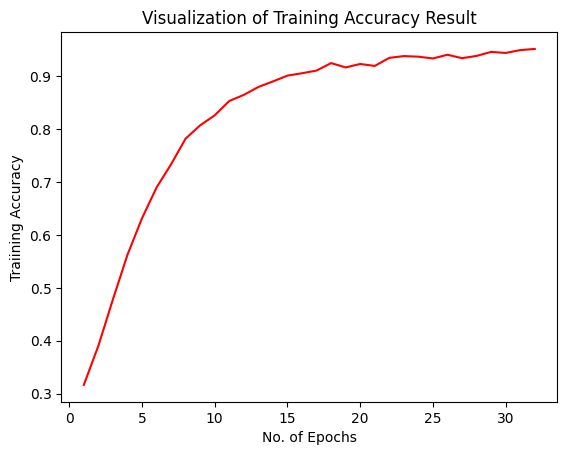

In [25]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

validasi akurasi

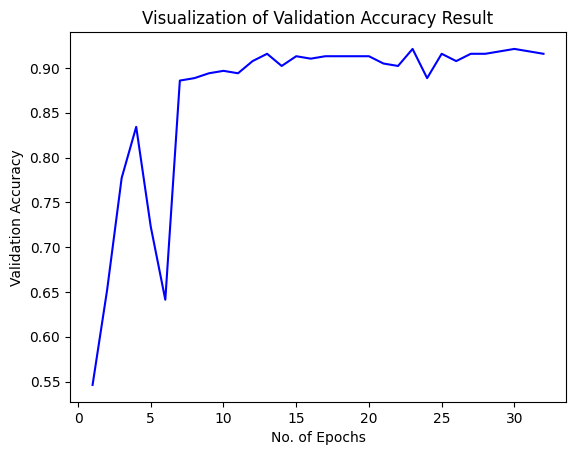

In [26]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

evaulating cnn model

In [27]:
traiing_loss,training_accuracy = cnn.evaluate(training_set)

111/111 [==============================] - 112s 960ms/step - loss: 0.0045 - accuracy: 0.9994


In [28]:
training_accuracy

0.9994359612464905

In [29]:
val_loss,val_accuracy = cnn.evaluate(validation_set)

12/12 [==============================] - 13s 248ms/step - loss: 6.0933 - accuracy: 0.9158


In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [31]:
test_loss,test_accuracy = cnn.evaluate(test_set)

12/12 [==============================] - 103s 2s/step - loss: 41.3138 - accuracy: 0.0585


In [32]:
test_accuracy

0.05849582329392433